In [1]:
Access_Token = "203369537-PbKVtncLxrbsANsFo58RzDTFJIRCXPG2fjpvQVZq"
Access_Token_Secret = "bC9wPltcrZH9xpEqYjYTUG0yiPohATGPBqpx1LXz8ufy3"

API_Key = "GanokZfGsXhowywYghiCk12FU"
API_Key_Secret = "HjdKN4B74bx7TQ4ALHgEBo79kOTg0nwcJzGOHSJjQlrywC3ubK"
Bearer_Token = "AAAAAAAAAAAAAAAAAAAAANiVewEAAAAAjqRkXmbL7msbZDyzpqkaEuM607Y%3D7BpCbmQBduWJ6nOns5qtwExeeGF4LCslTmjZhpuIHjn0d9UD7Y"



In [16]:
import tweepy 
import pandas as pd

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk 
stopwords_en = nltk.corpus.stopwords.words('english')
stopwords_es = nltk.corpus.stopwords.words('spanish')

In [4]:
client_query = tweepy.Client(bearer_token = Bearer_Token)
query = 'Chumel -is:retweet'
response = client_query.search_recent_tweets(query = query, max_results = 100)
response

Response(data=[<Tweet id=1552667658042200064 text='@MemeYamelCA Que desgracia de gobierno para ese país. A ver si no después el chumel o Brozo querrán candidatearse para presidente. Lo peor es que hay algunos que si  los sigan. Afortunadamente son pocos los descerebrados..'>, <Tweet id=1552666241302777856 text='@ChumelTorres Chumel Chumel. Inversión no es lo mismo que Gasto. Probablemente la prepa abierta te de mejor visión.'>, <Tweet id=1552665767157587971 text='@marcox1ant @ChumelTorres Más tonto venir a leer las pendejas de alguien que te desagrada creo yo , yo no lo leería o estaría al pendiente de lo que publica chumel si no me gusta lo que publica o su contenido.'>, <Tweet id=1552664578886189056 text='@julietaetznab No pueden con Oxxo, Bimbo, los videojuegos, Rappi, Chumel Torres, España y prácticamente todo lo que incomode o moleste al emperadorcillo bananero de Macuspana.'>, <Tweet id=1552664051788005382 text='Y este muppet, quién es? El papa del chumel?? https://t.co/nNrfILGf9

In [5]:
# More than 100 tweets
#Looking for 10,000 tweets talking about Chumel
Tweets_IDs = []
Tweets_text = []

for tweet in tweepy.Paginator(client_query.search_recent_tweets, query = query, max_results = 100).flatten(limit = 10000):
    Tweets_IDs.append(tweet.id)
    Tweets_text.append(tweet.text)

In [6]:
df = pd.DataFrame()
df['ID'] = Tweets_IDs
df['Tweet'] = Tweets_text
df.head()

,ID,Tweet
0,1552668847110590467,@DiegoGuerraHH @ChumelTorres JAJAJAJAJA lo dic...
1,1552668756173783045,@Wakorotti @eldeforma Pues yo veo mucho moreno...
2,1552668588871487489,"@ChumelTorres Al usar el término:""materia econ..."
3,1552667658042200064,@MemeYamelCA Que desgracia de gobierno para es...
4,1552666241302777856,@ChumelTorres Chumel Chumel. Inversión no es l...


In [7]:
df = df[~df.Tweet.str.contains("RT")]
df = df.reset_index(drop = True)

In [8]:
#This splits all the sentences up which makes it easier for us to work with

all_sentences = []
df_cleaning = df
for word in df_cleaning["Tweet"]:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


print(lines)

['@DiegoGuerraHH', '@ChumelTorres', 'JAJAJAJAJA', 'lo', 'dice', 'el', 'pobre', 'diablo', 'que', 'tiene', '3', 'seguidores', 'JAJAJAJAJAJA', 'se', 'nota', 'como', 'le', 'sacan', 'sus', 'bots', 'a', 'chumel', 'para', 'que', 'lo', 'defiendan.', '@Wakorotti', '@eldeforma', 'Pues', 'yo', 'veo', 'mucho', 'moreno', 'seguidor', 'de', 'Chumel', 'enojados', 'con', 'Tenoch.', '@ChumelTorres', 'Al', 'usar', 'el', 'término:"materia', 'económica",', 'se', 'quiere', 'escuchar', 'más', 'profesional,', 'jajaja,', 'y', 'lo', 'peor', 'es', 'que', 'hay', 'gente', 'que', 'cae', 'por', 'eso,', 'y', 'no', 'se', 'dan', 'cuenta', 'que', 'es', 'uno', 'de', 'tantos', 'paleros', 'pagados.', 'Y', 'qué', 'pena', 'que', 'encasillen', 'a', 'Chumel', 'como', 'alguien', 'de', 'la', '"oposición".', 'Así', 'operan', 'estos', 'güeyes.', '@MemeYamelCA', 'Que', 'desgracia', 'de', 'gobierno', 'para', 'ese', 'país.', 'A', 'ver', 'si', 'no', 'después', 'el', 'chumel', 'o', 'Brozo', 'querrán', 'candidatearse', 'para', 'presiden

In [9]:
stem2 = []

for word in lines:
    if word not in stopwords_es:
        stem2.append(word)

#stem2
stem2

['@DiegoGuerraHH',
 '@ChumelTorres',
 'JAJAJAJAJA',
 'dice',
 'pobre',
 'diablo',
 '3',
 'seguidores',
 'JAJAJAJAJAJA',
 'nota',
 'sacan',
 'bots',
 'chumel',
 'defiendan.',
 '@Wakorotti',
 '@eldeforma',
 'Pues',
 'veo',
 'moreno',
 'seguidor',
 'Chumel',
 'enojados',
 'Tenoch.',
 '@ChumelTorres',
 'Al',
 'usar',
 'término:"materia',
 'económica",',
 'quiere',
 'escuchar',
 'profesional,',
 'jajaja,',
 'peor',
 'gente',
 'cae',
 'eso,',
 'dan',
 'cuenta',
 'tantos',
 'paleros',
 'pagados.',
 'Y',
 'pena',
 'encasillen',
 'Chumel',
 'alguien',
 '"oposición".',
 'Así',
 'operan',
 'güeyes.',
 '@MemeYamelCA',
 'Que',
 'desgracia',
 'gobierno',
 'país.',
 'A',
 'ver',
 'si',
 'después',
 'chumel',
 'Brozo',
 'querrán',
 'candidatearse',
 'presidente.',
 'Lo',
 'peor',
 'si',
 'sigan.',
 'Afortunadamente',
 'pocos',
 'descerebrados..',
 '@ChumelTorres',
 'Chumel',
 'Chumel.',
 'Inversión',
 'mismo',
 'Gasto.',
 'Probablemente',
 'prepa',
 'abierta',
 'mejor',
 'visión.',
 '@marcox1ant',
 '@

In [19]:
stopwords_es.append('@ChumelTorres')
stopwords_es.append(',')
stopwords_es.append('.')
stopwords_es.append('Chumel')
stopwords_es.append('chumel')
stopwords_es.append('y')
stopwords_es.append('si')
stopwords_es.append('no')
stopwords_es.append('la')
stopwords_es.append('tan')

In [20]:
stem3 = []

for word in stem2:
    if word not in stopwords_es:
        stem3.append(word)

#stem2
stem3

['@DiegoGuerraHH',
 'JAJAJAJAJA',
 'dice',
 'pobre',
 'diablo',
 '3',
 'seguidores',
 'JAJAJAJAJAJA',
 'nota',
 'sacan',
 'bots',
 'defiendan.',
 '@Wakorotti',
 '@eldeforma',
 'Pues',
 'veo',
 'moreno',
 'seguidor',
 'enojados',
 'Tenoch.',
 'Al',
 'usar',
 'término:"materia',
 'económica",',
 'quiere',
 'escuchar',
 'profesional,',
 'jajaja,',
 'peor',
 'gente',
 'cae',
 'eso,',
 'dan',
 'cuenta',
 'tantos',
 'paleros',
 'pagados.',
 'Y',
 'pena',
 'encasillen',
 'alguien',
 '"oposición".',
 'Así',
 'operan',
 'güeyes.',
 '@MemeYamelCA',
 'Que',
 'desgracia',
 'gobierno',
 'país.',
 'A',
 'ver',
 'después',
 'Brozo',
 'querrán',
 'candidatearse',
 'presidente.',
 'Lo',
 'peor',
 'sigan.',
 'Afortunadamente',
 'pocos',
 'descerebrados..',
 'Chumel.',
 'Inversión',
 'mismo',
 'Gasto.',
 'Probablemente',
 'prepa',
 'abierta',
 'mejor',
 'visión.',
 '@marcox1ant',
 'Más',
 'tonto',
 'venir',
 'leer',
 'pendejas',
 'alguien',
 'desagrada',
 'creo',
 'leería',
 'pendiente',
 'publica',
 'gu

In [21]:
df = pd.DataFrame(stem3)

df = df[0].value_counts()

In [22]:
from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 11342, 2: 1791, 3: 776, 4: 383, 5: 232, 6: 180, 7: 119, 9: 79, 8: 79, 10: 58, ...})

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

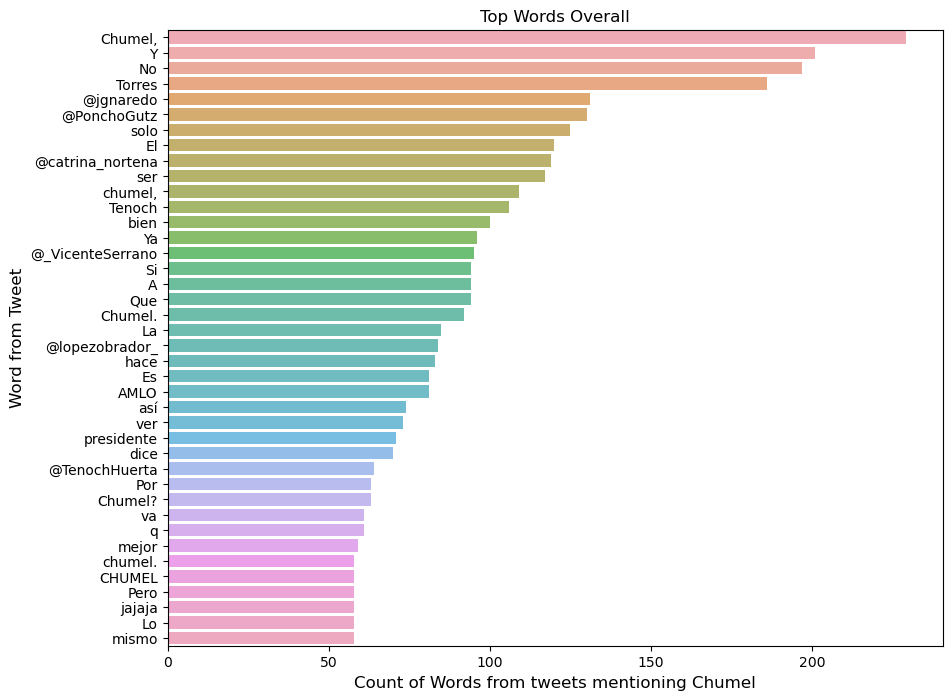

In [23]:
plt.clf()
df = df[:40,]
plt.figure(figsize=(10,8))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words from tweets mentioning Chumel', fontsize=12)
plt.show()